In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read Aviation_Data.csv located in the data folder in this directory
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [3]:
# check the first 5 rows of the data
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Demonstrating the relationship between whether a plane is amateur built and the amount of damage to the aircraft after a crash:

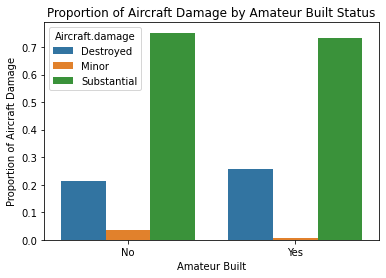

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First clean the data by removing any rows with a null value in the Amateur.Built column
df_amateur = df[df['Amateur.Built'].notna()]

# We then get rid of any rows in df_amateur that have a null value in the Aircraft.damage column
df_amateur = df_amateur[df_amateur['Aircraft.damage'].notna()]

# Get rid of any row in df_amateur that has an Aircraft.damage value of 'Unknown'
df_amateur = df_amateur[df_amateur['Aircraft.damage'] != 'Unknown']

# Calculate the count of each damage category for both amateur built and non-amateur built aircraft
damage_counts = df_amateur.groupby(['Amateur.Built', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both amateur built and non-amateur built groups
group_totals = damage_counts.groupby('Amateur.Built')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Amateur.Built')

# Calculate the proportion of each damage category for both amateur built and non-amateur built aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Generate a bar plot showing the relationship between amateur built and the proportion of damage to the aircraft
sns.barplot(x='Amateur.Built', y='proportion', hue='Aircraft.damage', data=damage_counts)
plt.xlabel('Amateur Built')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Amateur Built Status')
plt.show()



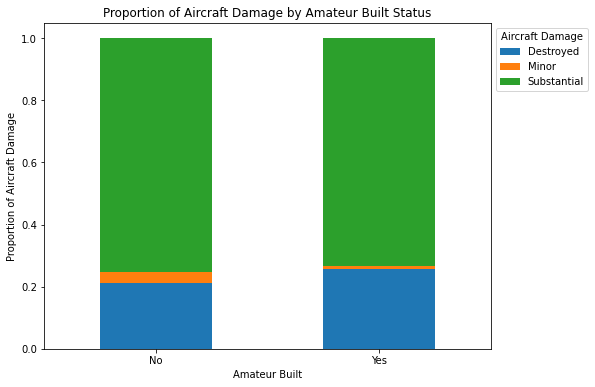

In [5]:
# Calculate the count of each damage category for both amateur built and non-amateur built aircraft
damage_counts = df_amateur.groupby(['Amateur.Built', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both amateur built and non-amateur built groups
group_totals = damage_counts.groupby('Amateur.Built')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Amateur.Built')

# Calculate the proportion of each damage category for both amateur built and non-amateur built aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = damage_counts.pivot_table(index='Amateur.Built', columns='Aircraft.damage', values='proportion').reset_index()

# Create a stacked bar chart
ax = stacked_data.plot(x='Amateur.Built', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Amateur Built')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Amateur Built Status')
plt.xticks(ticks=range(len(stacked_data['Amateur.Built'])), labels=stacked_data['Amateur.Built'], rotation=0)

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

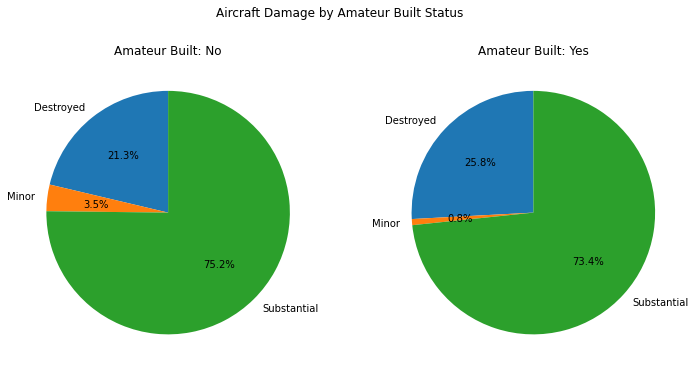

In [6]:
# Plot pie charts for each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Aircraft Damage by Amateur Built Status')

# Define group labels
group_labels = ['No', 'Yes']

for i, group in enumerate(group_labels):
    # Filter data for the current group
    group_data = damage_counts[damage_counts['Amateur.Built'] == group]

    # Plot pie chart
    axes[i].pie(group_data['count'], labels=group_data['Aircraft.damage'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Amateur Built: {group}")

# Show the plot
plt.show()

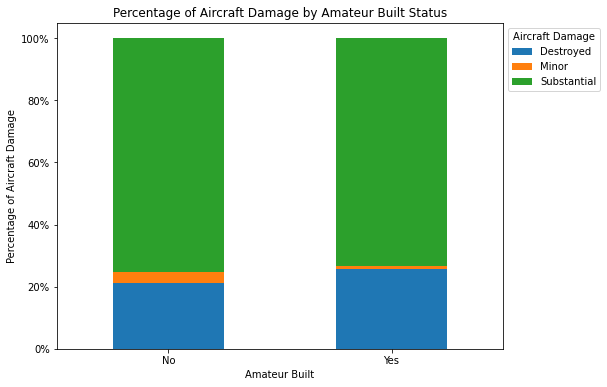

In [7]:
# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Amateur.Built', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Amateur Built')
plt.ylabel('Percentage of Aircraft Damage')
plt.title('Percentage of Aircraft Damage by Amateur Built Status')
plt.xticks(ticks=range(len(stacked_data['Amateur.Built'])), labels=stacked_data['Amateur.Built'], rotation=0)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The 100% stacked bar chart and other visuals above clearly show that amateur built aircraft are more likely to sustain more damage in a crash than non-amateur built aircraft. This is likely due to the fact that amateur built aircraft are less likely to have the same safety features as non-amateur built aircraft.

Which is safer, Helicopters or Airplanes?

In [8]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
# create a new dataframe with only the Helicopter and Airplane data
helicopter_airplane = df[(df['Aircraft.Category'] == 'Helicopter') | (df['Aircraft.Category'] == 'Airplane')]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [10]:
# remove all rows with value of 'Unknown' in the Aircraft.damage column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Aircraft.damage'] != 'Unknown']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [11]:
# # remove all rows with null values in the Aircraft.damage column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Aircraft.damage'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [12]:
# # remove all null values in the Injury.Severity column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Injury.Severity'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [13]:
# # there are several different values for Fatal that have formats like 'Fatal(1)' or 'Fatal(130)'. Combine all of these values into one value by looking if the first 5 characters are 'Fatal'. we can't simply look for 'Fatal' because there are 'Non-Fatal' values that we want to keep separate
helicopter_airplane['Injury.Severity'] = helicopter_airplane['Injury.Severity'].apply(lambda x: 'Fatal' if x[:5] == 'Fatal' else x)
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [14]:
# # remove all rows with Engine.Type values of 'Unknown'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'] != 'Unknown']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [15]:
# # remove all rows with Engine.Type values of null
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [16]:
# # remove all rows with Engine.Type values of 'UNK'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'] != 'UNK']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [17]:
 # remove all rows with Broad.phase.of.flight values of 'Unknown'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Broad.phase.of.flight'] != 'Unknown']

# remove all rows with Broad.phase.of.flight values of null
helicopter_airplane = helicopter_airplane[helicopter_airplane['Broad.phase.of.flight'].notna()]

helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


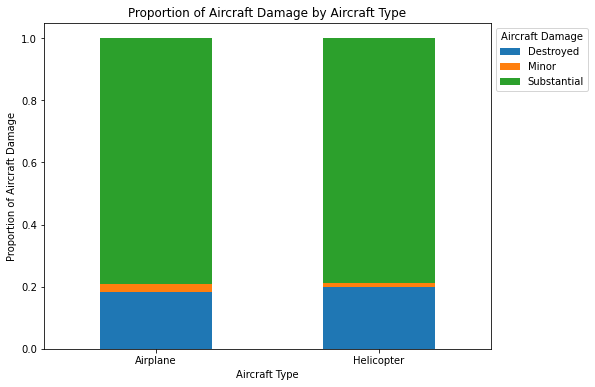

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to keep only the rows with 'Helicopter' or 'Airplane' values in the 'Aircraft.Category' column
filtered_data = helicopter_airplane[helicopter_airplane['Aircraft.Category'].isin(['Helicopter', 'Airplane'])]

# Perform a groupby operation on the filtered DataFrame using 'Aircraft.Category' and 'Aircraft.damage' columns, and compute the size of each group
damage_counts = filtered_data.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both helicopter and airplane groups
group_totals = damage_counts.groupby('Aircraft.Category')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Aircraft.Category')

# Calculate the proportion of each damage category for both helicopter and airplane aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='proportion').reset_index()

# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Aircraft.Category', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Aircraft Type')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Aircraft Type')
plt.xticks(ticks=range(len(stacked_data['Aircraft.Category'])), labels=stacked_data['Aircraft.Category'], rotation=0)

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [19]:
# Pivot the data to create a dataframe suitable for displaying the count of each damage category
count_table = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='count', aggfunc='sum').reset_index()

# Calculate the percentage of each damage category for helicopters and airplanes
percentage_table = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='proportion', aggfunc='sum').reset_index()

# Convert the percentage values to a more readable format (e.g., 25%)
percentage_table.iloc[:, 1:] = percentage_table.iloc[:, 1:].applymap(lambda x: f"{x * 100:.2f}%")

# Combine the count_table and percentage_table dataframes
combined_table = count_table.copy()
for col in count_table.columns[1:]:
    combined_table[col] = count_table[col].astype(str) + " (" + percentage_table[col] + ")"

# Display the combined table with count and percentage values
print(combined_table)

Aircraft.damage Aircraft.Category      Destroyed        Minor    Substantial
0                        Airplane  1142 (18.31%)  158 (2.53%)  4938 (79.16%)
1                      Helicopter   139 (19.77%)   10 (1.42%)   554 (78.81%)


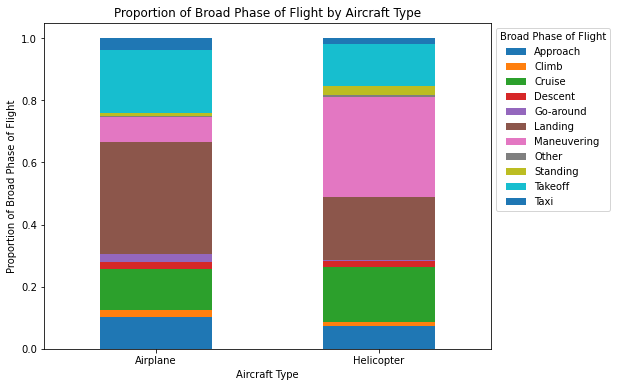

In [20]:
# Filter the DataFrame to keep only the rows with 'Helicopter' or 'Airplane' values in the 'Aircraft.Category' column
filtered_data = helicopter_airplane[helicopter_airplane['Aircraft.Category'].isin(['Helicopter', 'Airplane'])]

# Perform a groupby operation on the filtered DataFrame using 'Aircraft.Category' and 'Broad.phase.of.flight' columns, and compute the size of each group
phase_counts = filtered_data.groupby(['Aircraft.Category', 'Broad.phase.of.flight']).size().reset_index(name='count')

# Calculate the total count of aircraft for both helicopter and airplane groups
group_totals = phase_counts.groupby('Aircraft.Category')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
phase_counts = phase_counts.merge(group_totals, on='Aircraft.Category')

# Calculate the proportion of each phase category for both helicopter and airplane aircraft
phase_counts['proportion'] = phase_counts['count'] / phase_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = phase_counts.pivot_table(index='Aircraft.Category', columns='Broad.phase.of.flight', values='proportion').reset_index()

# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Aircraft.Category', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Aircraft Type')
plt.ylabel('Proportion of Broad Phase of Flight')
plt.title('Proportion of Broad Phase of Flight by Aircraft Type')
plt.xticks(ticks=range(len(stacked_data['Aircraft.Category'])), labels=stacked_data['Aircraft.Category'], rotation=0)

# Add legend and show the plot
plt.legend(title='Broad Phase of Flight', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [21]:
# Define the point system for 'Aircraft.damage' and 'Injury.Severity'
damage_points = {'Destroyed': 1, 'Substantial': 3, 'Minor': 5}
severity_points = {'Incident': 5, 'Minor': 4, 'Serious': 3, 'Non-Fatal': 2, 'Fatal': 1}

# Replace the 'Aircraft.damage' and 'Injury.Severity' values with their corresponding point values
helicopter_airplane['Aircraft.damage.points'] = helicopter_airplane['Aircraft.damage'].map(damage_points)
helicopter_airplane['Injury.Severity.points'] = helicopter_airplane['Injury.Severity'].map(severity_points)

# Calculate the average point value for each make and model
grouped_data = helicopter_airplane.groupby(['Make', 'Model']).agg({'Aircraft.damage.points': 'mean', 'Injury.Severity.points': 'mean'}).reset_index()



In [35]:
helicopter_airplane

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Aircraft.damage.points,Injury.Severity.points
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,3,2
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,3,2
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,3,2
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1,2
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63907,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,28.958056,-89.258889,NaN,South Pass 38,...,1.0,1.0,2.0,NaN,IMC,Approach,Probable Cause,15-07-2009,1,1
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,34.688611,-87.92,NaN,NaN,...,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009,3,1
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,20-06-2014,3,1
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,28-02-2008,3,2


In [34]:
# Calculate the total points and the total number of incidents for each make and model
grouped_data = helicopter_airplane.groupby(['Make', 'Model']).agg({'Aircraft.damage.points': 'sum', 'Injury.Severity.points': 'sum', 'Event.Id': 'count'}).reset_index()

# Normalize the scores by dividing the total points by the total number of incidents
grouped_data['Normalized.Aircraft.damage.points'] = grouped_data['Aircraft.damage.points'] / grouped_data['Event.Id']
grouped_data['Normalized.Injury.Severity.points'] = grouped_data['Injury.Severity.points'] / grouped_data['Event.Id']

# Compute the weighted average using the given weights
grouped_data['Safety.Score'] = (grouped_data['Normalized.Aircraft.damage.points'] * 0.1) + (grouped_data['Normalized.Injury.Severity.points'] * 0.90)

# Sort the dataframe by the safety score
sorted_data = grouped_data.sort_values(by='Safety.Score', ascending=True)

# Display the safety score for each make and model
sorted_data[['Make', 'Model', 'Safety.Score']].head(100)
sorted_data

,Make,Model,Aircraft.damage.points,Injury.Severity.points,Event.Id,Normalized.Aircraft.damage.points,Normalized.Injury.Severity.points,Safety.Score
1795,Piper,PA-42,1,1,1,1.0,1.0,1.0
1462,Mbb,BO-105S,1,1,1,1.0,1.0,1.0
1461,Mbb,BO-105C,1,1,1,1.0,1.0,1.0
1124,Flitecraft,SENIOR AERO,1,1,1,1.0,1.0,1.0
1979,Ryan,PT-22,1,1,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
484,Boeing,757-225,5,5,1,5.0,5.0,5.0
105,Airbus,A320-232,5,5,1,5.0,5.0,5.0
2017,Short Bros.,SC7 SERIES 3,5,5,1,5.0,5.0,5.0
479,Boeing,747,5,5,1,5.0,5.0,5.0


In [33]:
# Filter the DataFrame to only include makes and models with a perfect safety score of 5
perfect_score_data = sorted_data[sorted_data['Safety.Score'] == 5]

# Add a new column 'Accident.Count' to store the number of accidents for each model
perfect_score_data['Accident.Count'] = perfect_score_data['Event.Id']

# Drop the 'Event.Id' column
perfect_score_data = perfect_score_data.drop(columns=['Event.Id'])

# Rank the makes and models based on the least number of accidents
perfect_score_data = perfect_score_data.sort_values(by='Accident.Count', ascending=True)

# Display the ranked makes and models 
perfect_score_data[['Make', 'Model', 'Safety.Score', 'Accident.Count']]
perfect_score_data

<ipython-input-33-67cad844c143>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_score_data['Accident.Count'] = perfect_score_data['Event.Id']


,Make,Model,Aircraft.damage.points,Injury.Severity.points,Normalized.Aircraft.damage.points,Normalized.Injury.Severity.points,Safety.Score,Accident.Count
1380,Learjet,36,5,5,5.0,5.0,5.0,1
109,Airbus Industrie,A320-211,5,5,5.0,5.0,5.0,1
1234,Gulfstream American,G-159C,5,5,5.0,5.0,5.0,1
1233,Gulfstream American,G-159,5,5,5.0,5.0,5.0,1
1796,Piper,PA-44,5,5,5.0,5.0,5.0,1
2099,Swearingen,SA-266TC,5,5,5.0,5.0,5.0,1
1146,Gates Lear Jet,35A,5,5,5.0,5.0,5.0,1
201,Beech,100,5,5,5.0,5.0,5.0,1
1788,Piper,PA-34-22OT,5,5,5.0,5.0,5.0,1
202,Beech,18,5,5,5.0,5.0,5.0,1


The general trend of crashes since the beginning of this data has been tracked is downwards. Maybe due to better technology and safety standards?

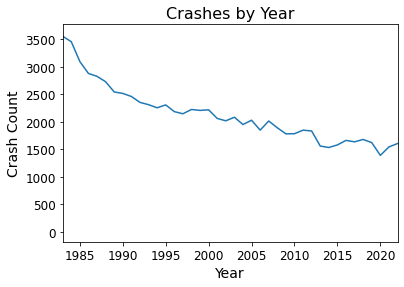

In [39]:
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year
year_crashes = df.groupby('Event.Year')['Accident.Number'].count().reset_index(name='Crash_Count')
# Create a line plot of the crash count by year
ax = sns.lineplot(x='Event.Year', y='Crash_Count', data=year_crashes)
ax.set_xlim([1983, year_crashes['Event.Year'].max()])  # set the x-axis limits from 1985 to the max year in the data
# Set the x and y axis labels and the title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Crash Count', fontsize=14)
ax.set_title('Crashes by Year', fontsize=16)
# Set the tick label font sizes
ax.tick_params(axis='both', which='major', labelsize=12)